# Assignment 3 rubric

## Task 1

In [1]:
# Import stuff
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import osmnx as ox
import networkx as nx

graph = ox.load_graphml('/Users/user/OneDrive - University Of Oregon/UO/TA/490/asgt3/graph.graphml')

In [2]:
# a) 
# Convert the graph to two GeoDataFrames, one containing edges and one containing the nodes.
nodes = ox.graph_to_gdfs(graph, nodes=True, edges=False)
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

# How many nodes and edges does this graph have?
print("nodes:",nodes.shape[0] ,"   edges:",edges.shape[0])

nodes: 19793    edges: 42508


In [9]:
nodes

,nodeID,x,y,geometry
osmid,,,,
0,0,474471.651693,4.813048e+06,POINT (474471.652 4813047.859)
1,1,474446.659714,4.813218e+06,POINT (474446.660 4813218.049)
4,4,474465.724070,4.817570e+06,POINT (474465.724 4817570.071)
2,2,473978.436524,4.814030e+06,POINT (473978.437 4814030.307)
3,3,474305.533925,4.813547e+06,POINT (474305.534 4813546.860)
...,...,...,...,...
19787,19787,985086.134288,4.900362e+06,POINT (985086.134 4900362.375)
19788,19788,486748.068451,5.005300e+06,POINT (486748.068 5005299.982)
19789,19789,486103.495526,5.005312e+06,POINT (486103.496 5005312.082)


In [19]:
nodes_np = nodes.index.to_numpy
nodes_np

<bound method IndexOpsMixin.to_numpy of Int64Index([    0,     1,     4,     2,     3, 16888,     5,     6,   243,
            17004,
            ...
            19773, 19777, 19778, 19783, 19786, 19787, 19788, 19789, 19791,
            19792],
           dtype='int64', name='osmid', length=19793)>

In [3]:
# a) alt
nx.info(graph)

/var/folders/lf/xl3n3jq557q8cgbxb_shw6x00000gn/T/ipykernel_72788/264455952.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(graph)


'MultiDiGraph with 19793 nodes and 42508 edges'

In [10]:
# b) What is the coordinate reference system of the nodes GeoDataFrame?
nodes.crs

<Derived Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
nodes

,nodeID,x,y,geometry
osmid,,,,
0,0,474471.651693,4.813048e+06,POINT (474471.652 4813047.859)
1,1,474446.659714,4.813218e+06,POINT (474446.660 4813218.049)
4,4,474465.724070,4.817570e+06,POINT (474465.724 4817570.071)
2,2,473978.436524,4.814030e+06,POINT (473978.437 4814030.307)
3,3,474305.533925,4.813547e+06,POINT (474305.534 4813546.860)
...,...,...,...,...
19787,19787,985086.134288,4.900362e+06,POINT (985086.134 4900362.375)
19788,19788,486748.068451,5.005300e+06,POINT (486748.068 5005299.982)
19789,19789,486103.495526,5.005312e+06,POINT (486103.496 5005312.082)


In [5]:
# c) List the column names in the edges GeoDataFrame.
edges.columns

Index(['name', 'length', 'geometry'], dtype='object')

In [6]:
# d) What is the min, max, and mean edge length?

min_edge  = edges['length'].min()
max_edge  = edges['length'].max()
mean_edge = edges['length'].mean()
print("min:",min_edge,"  max:",max_edge,"  mean:",mean_edge)

min: 1.370217966253487   max: 21730.128883116628   mean: 674.3728080973483


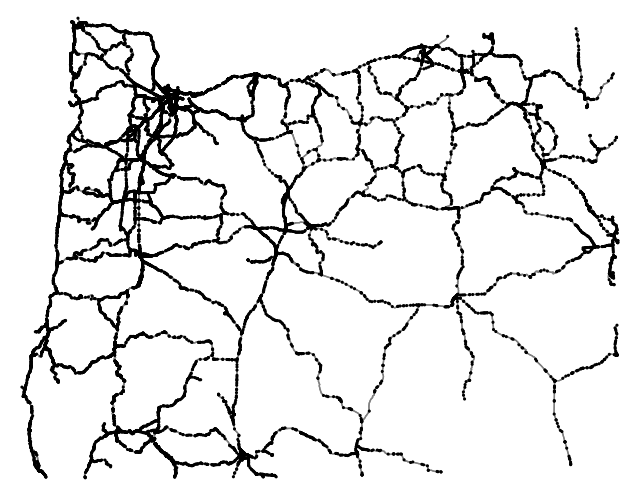

In [7]:
# e) Produce and customize a plot showing the Oregon Highway Network.
fig, ax = ox.plot_graph(graph, bgcolor='white', node_color='black', edge_color='grey', node_size=5)

## Task 2

In [2]:
# Read the oregon_cities.shp using GeoPandas.

goroda = gpd.read_file('/Users/user/OneDrive - University Of Oregon/UO/TA/490/asgt3/oregon_cities/oregon_cities.shp')

In [3]:
# a) Reproject the city GeoDataFrame to UTM Zone 10 N.

goroda_reproj = goroda.to_crs('EPSG:32610')

In [10]:
goroda_reproj

,City,lat,lon,geometry
0,Adair Village city,44.67,-123.22,POINT (482561.392 4946316.184)
1,Adams,45.77,-118.56,POINT (845212.127 5078087.252)
2,Adrian,43.74,-117.07,POINT (977541.425 4860113.062)
3,Albany,44.63,-123.10,POINT (492067.910 4941854.290)
4,Aloha,45.49,-122.87,POINT (510158.282 5037393.753)
...,...,...,...,...
372,Wood Village,45.54,-122.42,POINT (545281.434 5043103.988)
373,Woodburn,45.15,-122.86,POINT (511005.313 4999623.251)
374,Yachats,44.31,-124.10,POINT (412268.825 4906893.114)
375,Yamhill,45.34,-123.19,POINT (485113.923 5020738.776)


In [4]:
# b) Choose four cities in Oregon (the more spread out the better!) 
#    and compute the Euclidean distance (in km) between each pair.

# je choisis les villes de Bend, Corvallis, Eugene, et Portland
# Note that .copy() stops the error message
villes = goroda_reproj[goroda_reproj['City'].isin(['Bend','Corvallis','Eugene','Portland'])].copy()

# compute distances
# first, convert GeoDataFrames to shapely Point objects.
from shapely.geometry import Point
point1 = Point(villes[villes['City'] == "Bend"].geometry.x, villes[villes['City'] == "Bend"].geometry.y)
point2 = Point(villes[villes['City'] == "Corvallis"].geometry.x, villes[villes['City'] == "Corvallis"].geometry.y)
point3 = Point(villes[villes['City'] == "Eugene"].geometry.x, villes[villes['City'] == "Eugene"].geometry.y)
point4 = Point(villes[villes['City'] == "Portland"].geometry.x, villes[villes['City'] == "Portland"].geometry.y)

# second, do some math
villes['dist_from_bend']      = villes.distance(point1) / 1000
villes['dist_from_corvallis'] = villes.distance(point2) / 1000
villes['dist_from_eugene']    = villes.distance(point3) / 1000
villes['dist_from_portland']  = villes.distance(point4) / 1000

In [12]:
villes

,City,lat,lon,geometry,dist_from_bend,dist_from_corvallis,dist_from_eugene,dist_from_portland
28,Bend,44.06,-121.31,POINT (635358.304 4879925.377),0.000000,167.011180,144.976079,195.613181
68,Corvallis,44.57,-123.28,POINT (477767.278 4935222.781),167.011180,0.000000,58.067148,118.625005
100,Eugene,44.06,-123.12,POINT (490388.807 4878543.943),144.976079,58.067148,0.000000,168.552866
262,Portland,45.54,-122.65,POINT (527325.009 5042999.972),195.613181,118.625005,168.552866,0.000000


In [5]:
# c) List the nearest node for each of the four cities.

# get x y coordinates
bnd  = [villes.iloc[0].geometry.x, villes.iloc[0].geometry.y]
corv = [villes.iloc[1].geometry.x, villes.iloc[1].geometry.y]
eug  = [villes.iloc[2].geometry.x, villes.iloc[2].geometry.y]
port = [villes.iloc[3].geometry.x, villes.iloc[3].geometry.y]

In [6]:
# Find the node in the graph that is closest to the origin point
bnd_node  = ox.distance.nearest_nodes(graph, X=bnd[0], Y=bnd[1], return_dist=False)
corv_node = ox.distance.nearest_nodes(graph, X=corv[0], Y=corv[1], return_dist=False)
eug_node  = ox.distance.nearest_nodes(graph, X=eug[0], Y=eug[1], return_dist=False)
port_node = ox.distance.nearest_nodes(graph, X=port[0], Y=port[1], return_dist=False)

print("bend:",bnd_node," corvallis:",corv_node," eugene:",eug_node," portland:",port_node)

bend: 14709  corvallis: 831  eugene: 5888  portland: 16881


In [15]:
# d) What is the shortest path length (i.e. nx.shortest_path_length) between each pair of cities (in km)? 
# Produce and customize a plot showing each route with your answer 
# (i.e. fig, ax = ox.plot_graph_route(graph, route)).

# Calculate the shortest path
eug_corv_route  = nx.shortest_path(G=graph, source=eug_node, target=corv_node, weight='length')
eug_corv_length = nx.shortest_path_length(G=graph, source=eug_node, target=corv_node, weight='length')

eug_bend_route  = nx.shortest_path(G=graph, source=eug_node, target=bnd_node, weight='length')
eug_bend_length = nx.shortest_path_length(G=graph, source=eug_node, target=bnd_node, weight='length')

eug_port_route  = nx.shortest_path(G=graph, source=eug_node, target=port_node, weight='length')
eug_port_length = nx.shortest_path_length(G=graph, source=eug_node, target=port_node, weight='length')


In [16]:
print("Shortest path distance = {t:.1f} km.".format(t=eug_port_length/1000))

Shortest path distance = 179.1 km.


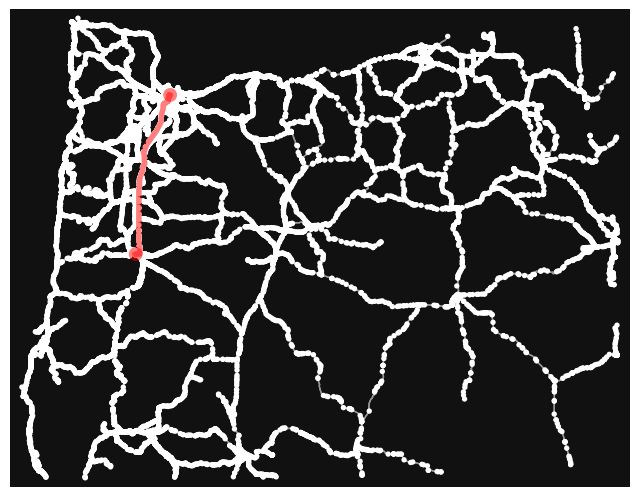

In [17]:
# Plot the shortest path using folium
fig, ax = ox.plot_graph_route(graph, eug_port_route)

Shortest path distance = 262.1 km.


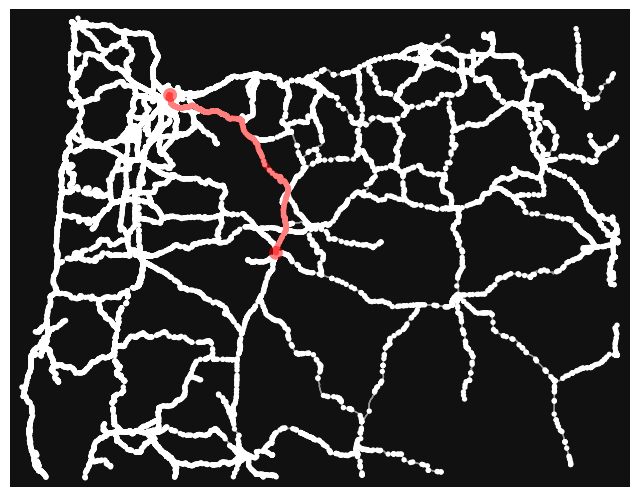

In [18]:
# Calculate the shortest path
bnd_port_route  = nx.shortest_path(G=graph, source=bnd_node, target=port_node, weight='length')
bnd_port_length = nx.shortest_path_length(G=graph, source=bnd_node, target=port_node, weight='length')
print("Shortest path distance = {t:.1f} km.".format(t=bnd_port_length/1000))
# Plot the shortest path using folium
fig, ax = ox.plot_graph_route(graph, bnd_port_route)

Shortest path distance = 206.1 km.


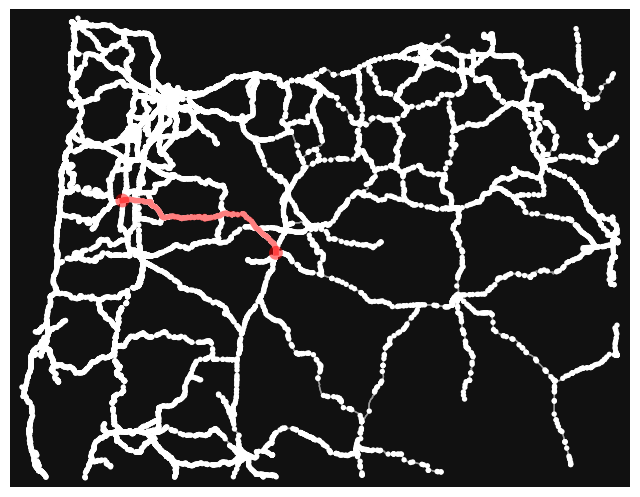

In [19]:
# Calculate the shortest path
corv_bnd_route  = nx.shortest_path(G=graph, source=corv_node, target=bnd_node, weight='length')
corv_bnd_length = nx.shortest_path_length(G=graph, source=corv_node, target=bnd_node, weight='length')
print("Shortest path distance = {t:.1f} km.".format(t=corv_bnd_length/1000))
# Plot the shortest path using folium
fig, ax = ox.plot_graph_route(graph, corv_bnd_route)

In [20]:
# f) On average, how much longer is the network distance vs. the equivalent Euclidean distance?
villes

,City,lat,lon,geometry,dist_from_bend,dist_from_corvallis,dist_from_eugene,dist_from_portland
28,Bend,44.06,-121.31,POINT (635358.304 4879925.377),0.000000,167.011180,144.976079,195.613181
68,Corvallis,44.57,-123.28,POINT (477767.278 4935222.781),167.011180,0.000000,58.067148,118.625005
100,Eugene,44.06,-123.12,POINT (490388.807 4878543.943),144.976079,58.067148,0.000000,168.552866
262,Portland,45.54,-122.65,POINT (527325.009 5042999.972),195.613181,118.625005,168.552866,0.000000


In [21]:
import numpy as np
mean_euclidean = np.mean((villes.iloc[2]['dist_from_corvallis'], villes.iloc[0]['dist_from_portland'], \
                         villes.iloc[1]['dist_from_bend']))
mean_network = np.mean((eug_corv_length, bnd_port_length, corv_bnd_length))/1000

In [22]:
mean_network - mean_euclidean

40.15270360107391

In [23]:
# MAX'S LENGTHY ALTERNATIVE
mn_eu = np.mean(villes.iloc[2]['dist_from_corvallis'])
mn_nw = np.mean(eug_corv_length)/1000
print(mn_eu,mn_nw)
d1 = mn_nw - mn_eu

mn_eu = np.mean(villes.iloc[0]['dist_from_portland'])
mn_nw = np.mean(bnd_port_length)/1000
print(mn_eu,mn_nw)
d2 = mn_nw - mn_eu

mn_eu = np.mean(villes.iloc[1]['dist_from_bend'])
mn_nw = np.mean(corv_bnd_length)/1000
print(mn_eu,mn_nw)
d3 = mn_nw - mn_eu

np.mean((d1,d2,d3)) # 2 parenth make sure to account for floats! (nmbrs with decimals)

58.067147687507166 72.95406327437573
195.61318090009243 262.0644771308955
167.01118002349347 206.13107900904345


40.152703601073874

In [24]:
# g) How long would it take to travel between your chosen pairs of cities given an average speed of 60 mph?
# convert to miles AND per hour
time = eug_corv_length / 1000 / 1.609 / 60 * 60
print("It takes {t:.1f} minutes to drive from Eugene to Corvallis.".format(t=time))

It takes 45.3 minutes to drive from Eugene to Corvallis.


In [25]:
time = bnd_port_length / 1000 / 1.609 / 60 * 60
print("It takes {t:.1f} minutes to drive from Bend to Portland.".format(t=time))

It takes 162.9 minutes to drive from Bend to Portland.


In [26]:
time = corv_bnd_length / 1000 / 1.609 / 60 * 60
print("It takes {t:.1f} minutes to drive from Corvallis to Bend.".format(t=time))

It takes 128.1 minutes to drive from Corvallis to Bend.


In [27]:
# Shauny Help
ast = goroda_reproj[goroda_reproj['City']=='Astoria']
ast

,City,lat,lon,geometry
13,Astoria,46.19,-123.81,POINT (437494.936 5115476.994)


In [28]:
pend = goroda_reproj[goroda_reproj['City']=='Pendleton']
pend

,City,lat,lon,geometry
252,Pendleton,45.67,-118.82,POINT (825579.293 5065886.212)


In [29]:
# get np arrays
import numpy as np

ast_yx = np.array([ast['geometry'].y, ast['geometry'].x])
ast_yx

array([[5115476.9943771 ],
       [ 437494.93575863]])

In [30]:
pend_yx = np.array([pend['geometry'].y, pend['geometry'].x])
pend_yx

array([[5065886.21234563],
       [ 825579.29339413]])

In [31]:
a_p = np.sum(np.square(ast_yx - pend_yx))
a_p

153068714303.8457

In [32]:
np.sqrt(a_p)/1000

391.23997022779474

In [33]:
graph

In [ ]:
graph

In [ ]:
nx.shortest_path(G=graph)